In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [114]:
data = pd.read_csv("/Users/sa20/Desktop/Data_Analyst_Job_Trends/Data/gsearch_jobs.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           61953 non-null  int64  
 1   index                61953 non-null  int64  
 2   title                61953 non-null  object 
 3   company_name         61953 non-null  object 
 4   location             61916 non-null  object 
 5   via                  61944 non-null  object 
 6   description          61953 non-null  object 
 7   extensions           61953 non-null  object 
 8   job_id               61953 non-null  object 
 9   thumbnail            38194 non-null  object 
 10  posted_at            61763 non-null  object 
 11  schedule_type        61707 non-null  object 
 12  work_from_home       27980 non-null  object 
 13  salary               10088 non-null  object 
 14  search_term          61953 non-null  object 
 15  date_time            61953 non-null 

In [115]:
data.shape

(61953, 27)

In [116]:
data.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']"
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,...,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']"
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']"


In [117]:
data.describe()

,Unnamed: 0,index,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,61953.000000,61953.000000,0.0,10088.000000,9512.000000,9512.000000,5900.000000,4069.000000,10088.000000
mean,30976.000000,1139.077333,NaN,42100.231239,34846.281874,50487.856787,40.539588,104115.406718,92289.425683
std,17884.434951,690.256113,NaN,55893.993519,45843.034891,67366.522273,22.214540,36024.388492,43277.933820
min,0.000000,0.000000,NaN,7.250000,8.000000,10.000000,7.250000,29289.840000,15080.000000
25%,15488.000000,553.000000,NaN,31.500000,19.520000,45.000000,23.265000,80000.180000,62400.000000
50%,30976.000000,1111.000000,NaN,60.000000,50.000000,75.000000,33.500000,96500.000000,88400.000000
75%,46464.000000,1685.000000,NaN,92500.000000,77000.000000,110000.000000,55.000000,120000.000000,117500.000000
max,61952.000000,3228.000000,NaN,550000.000000,450000.000000,850000.000000,300.000000,550000.000000,624000.000000


In [118]:
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data

commute_time           61953
salary_yearly          57884
salary_hourly          56053
salary_max             52441
salary_min             52441
salary                 51865
salary_standardized    51865
salary_avg             51865
salary_rate            51865
salary_pay             51865
work_from_home         33973
thumbnail              23759
schedule_type            246
posted_at                190
location                  37
via                        9
Unnamed: 0                 0
search_location            0
date_time                  0
search_term                0
index                      0
job_id                     0
extensions                 0
description                0
company_name               0
title                      0
description_tokens         0
dtype: int64

In [119]:
data.drop(['commute_time', 'salary_yearly', 'salary_hourly'], axis= 1, inplace=True)

over 90 percent of data missing

In [120]:
data.nunique()

Unnamed: 0             61953
index                   3229
title                  23292
company_name           13429
location                1254
via                     1024
description            42976
extensions              9668
job_id                 58775
thumbnail              14686
posted_at                109
schedule_type             32
work_from_home             1
salary                  2225
search_term                1
date_time               6588
search_location            1
salary_pay              2225
salary_rate                3
salary_avg              1233
salary_min               837
salary_max               834
salary_standardized     1216
description_tokens     11276
dtype: int64

In [121]:
data.drop(['Unnamed: 0'], axis= 1, inplace=True)

In [122]:
data.columns

Index(['index', 'title', 'company_name', 'location', 'via', 'description',
       'extensions', 'job_id', 'thumbnail', 'posted_at', 'schedule_type',
       'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'salary_pay', 'salary_rate', 'salary_avg',
       'salary_min', 'salary_max', 'salary_standardized',
       'description_tokens'],
      dtype='object')

In [123]:
data.duplicated().sum()

0

## Univariate Analysis

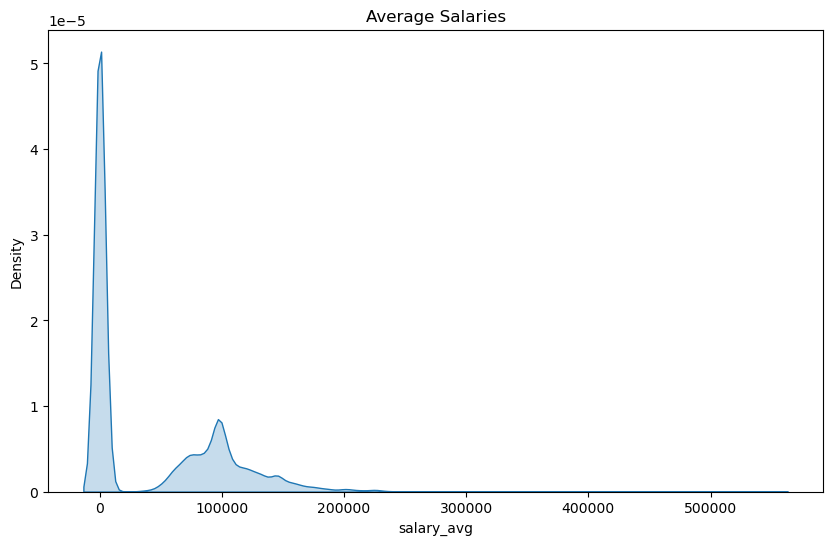

In [124]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['salary_avg'].dropna(), fill=True, bw_adjust=0.5)
plt.title('Average Salaries')
plt.show()

### Average salaries are concentrated around the $100k range but with that being said, we have a large spike at 0 which more than likely indicates missing or unpaid entries. These unaccounted for entries contributes toward our average salaries being heavily right-skewed

In [125]:
top_25_locations = data['location'].value_counts().head(25)
top_25_locations

location
 Anywhere                  18067
  United States            10011
Anywhere                    9915
United States               5547
Denver, CO                  1062
  Oklahoma City, OK         1028
  Kansas City, MO            840
Kansas City, MO              573
  Jefferson City, MO         550
Colorado Springs, CO         512
  Bentonville, AR            422
Oklahoma City, OK            409
Jefferson City, MO           371
Aurora, CO                   346
  Topeka, KS                 310
  Wichita, KS                307
  Tulsa, OK                  297
  Overland Park, KS          270
Englewood, CO                254
Columbia, MO                 218
  Springfield, MO            215
Tulsa, OK                    213
Wichita, KS                  179
Bentonville, AR              176
Boulder, CO                  173
Name: count, dtype: int64

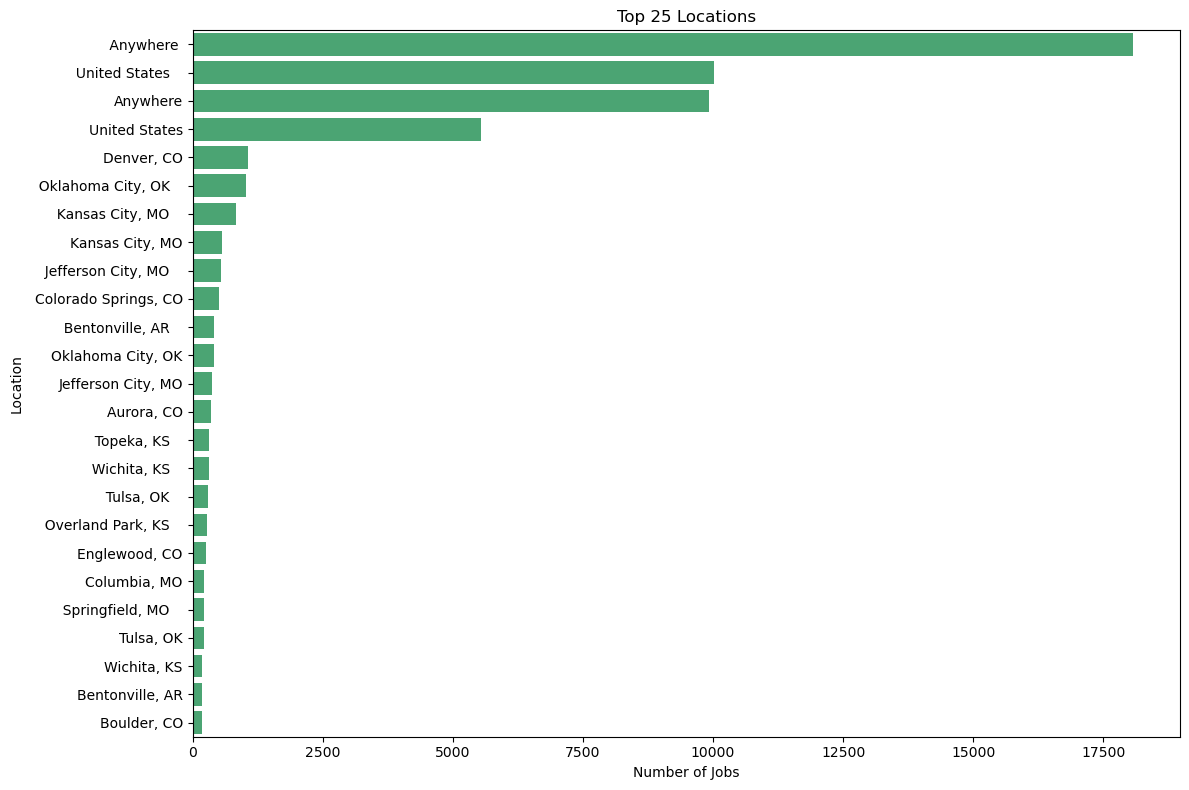

In [126]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_25_locations.index, x=top_25_locations.values, color='mediumseagreen')
plt.title('Top 25 Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

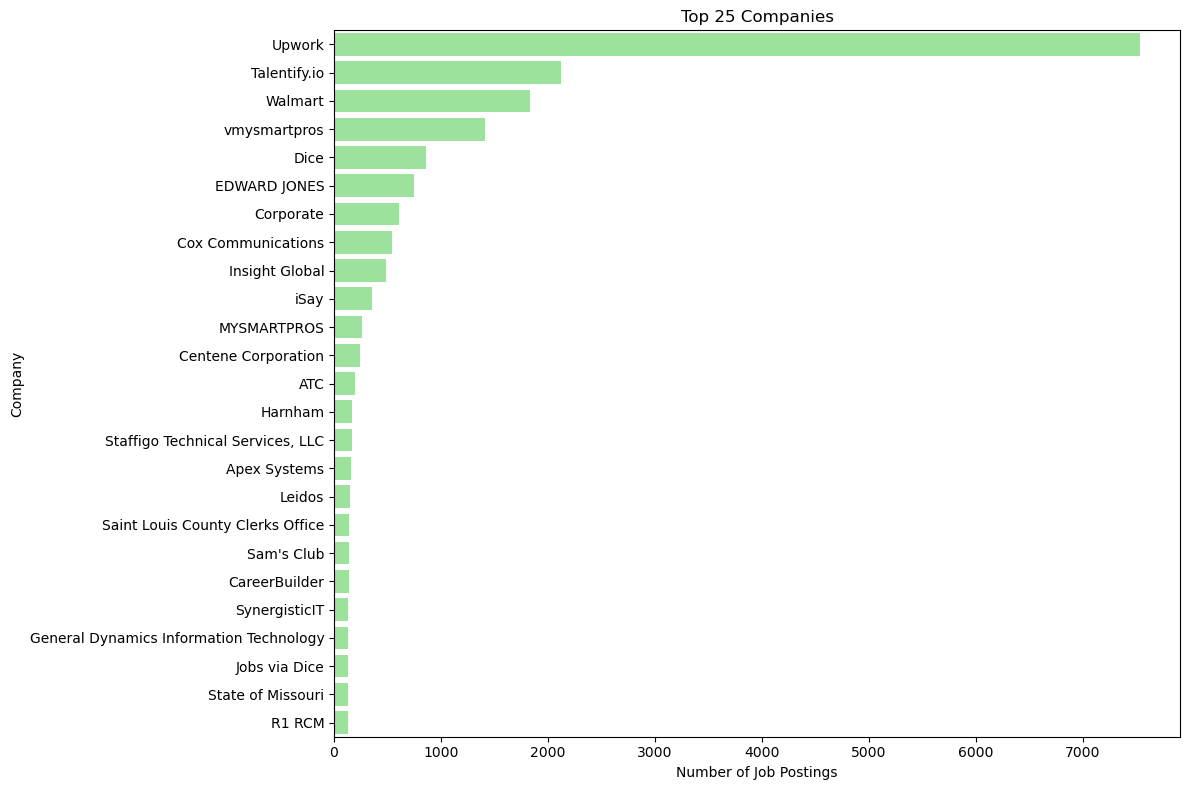

In [127]:
top_25_companies = data['company_name'].value_counts().head(25)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_25_companies.index, x=top_25_companies.values, color='lightgreen')
plt.title('Top 25 Companies')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


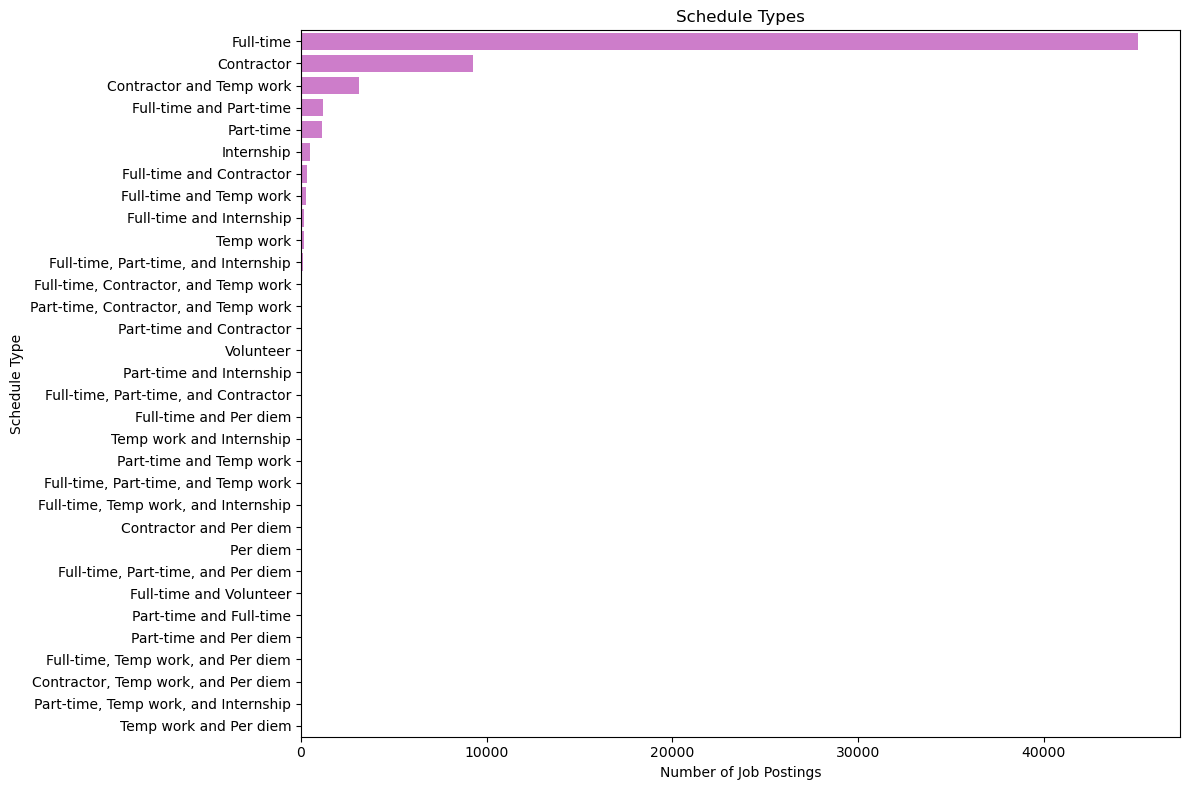

In [128]:
schedule_counts = data['schedule_type'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=schedule_counts.index, x=schedule_counts.values, color='orchid')
plt.title('Schedule Types')
plt.xlabel('Number of Job Postings')
plt.ylabel('Schedule Type')
plt.tight_layout()
plt.show()

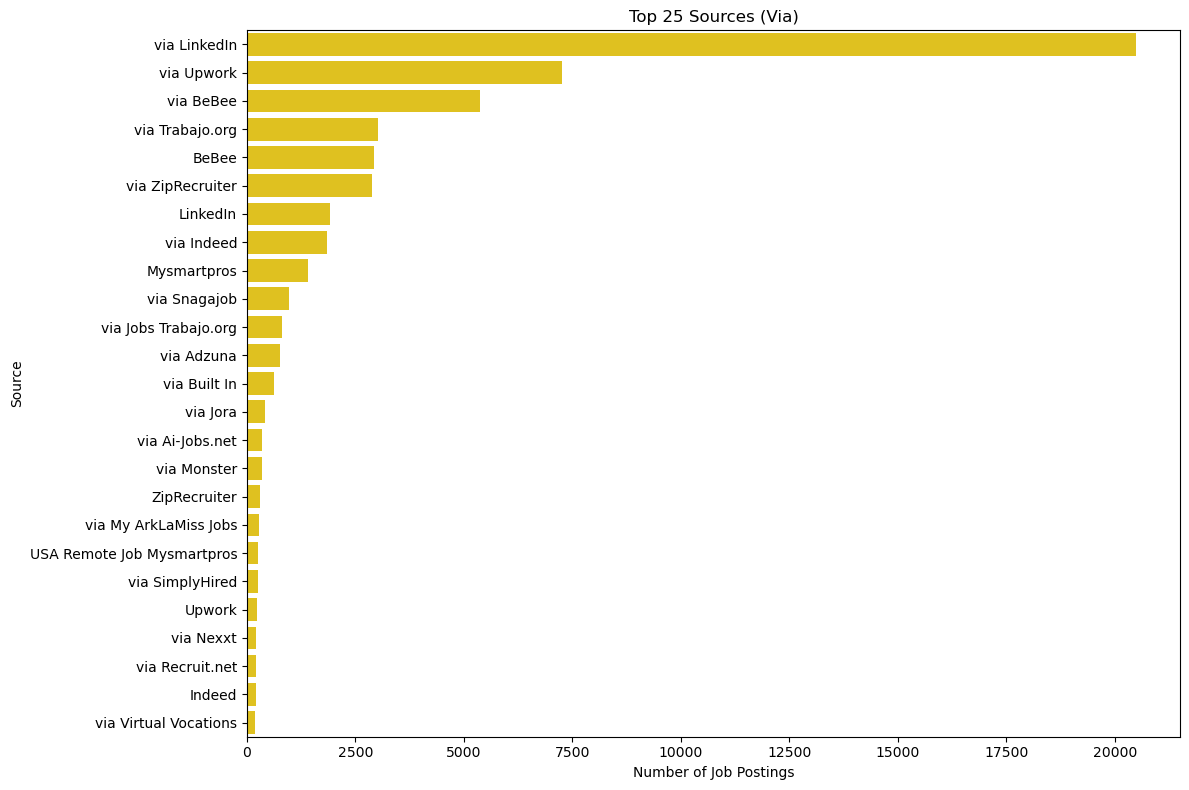

In [129]:
top_25_via = data['via'].value_counts().head(25)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_25_via.index, x=top_25_via.values, color='gold')
plt.title('Top 25 Sources (Via)')
plt.xlabel('Number of Job Postings')
plt.ylabel('Source')
plt.tight_layout()
plt.show()

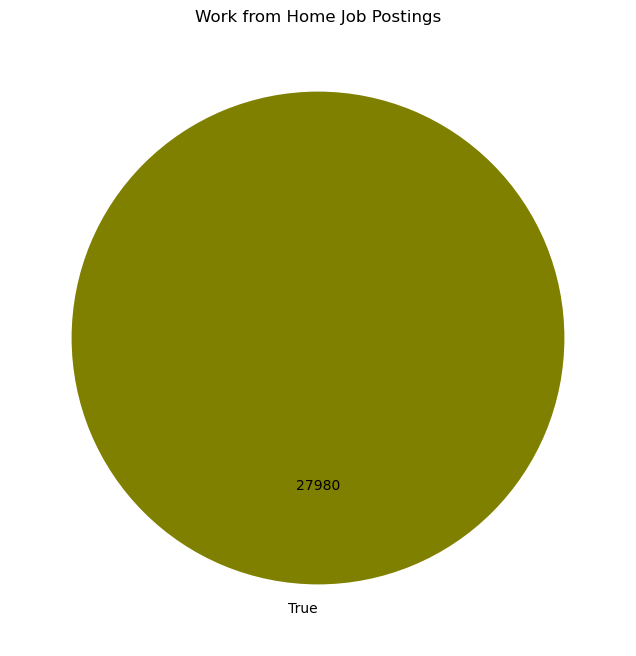

In [130]:
wfh_counts = data['work_from_home'].value_counts()
colors = ["olive","skyblue"]

plt.figure(figsize=(8, 8))
plt.pie(
    wfh_counts, 
    labels=wfh_counts.index, 
    autopct=lambda pct: f"{int(pct * sum(wfh_counts) / 100)}",
    colors=colors, 
    startangle=90
    )
plt.title('Work from Home Job Postings')
plt.show()

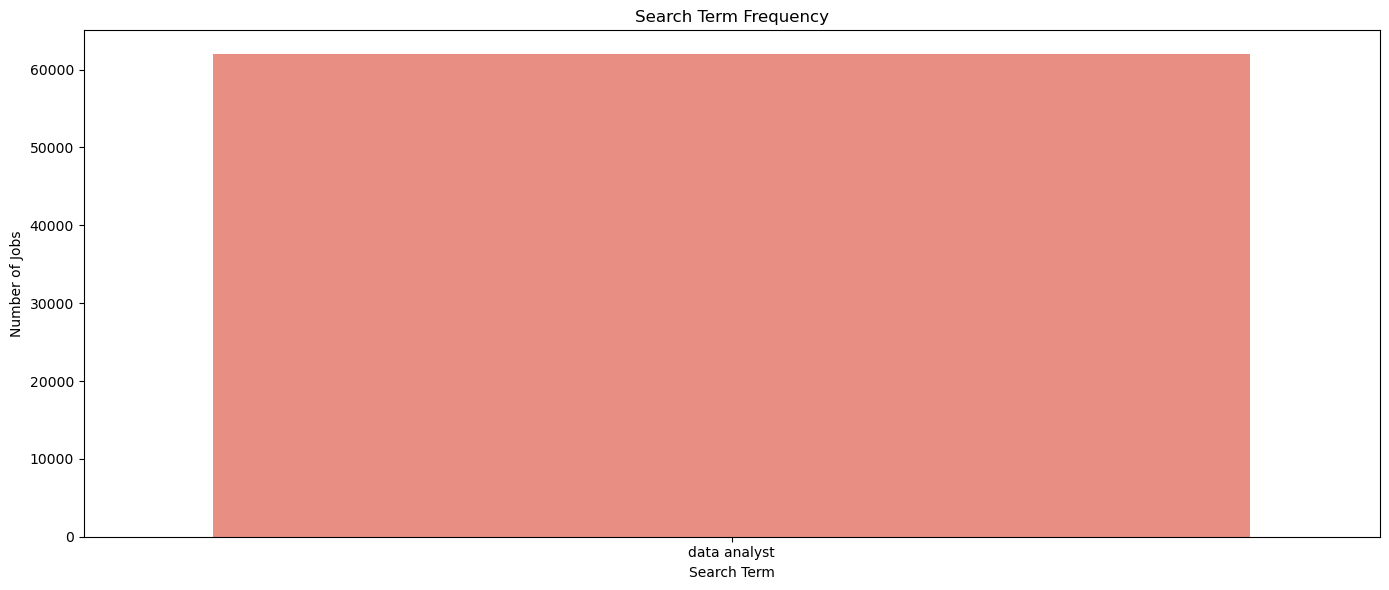

In [131]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='search_term', color='salmon', order=data['search_term'].value_counts().index)
plt.title('Search Term Frequency')
plt.xlabel('Search Term')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()

# Bivariate Analysis

/var/folders/3f/6n41dbh50j169t78h6tncq1m0000gn/T/ipykernel_1065/1066743274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[data['schedule_type'].isin(top_10)], x='schedule_type', y='salary_avg', palette='Set2')


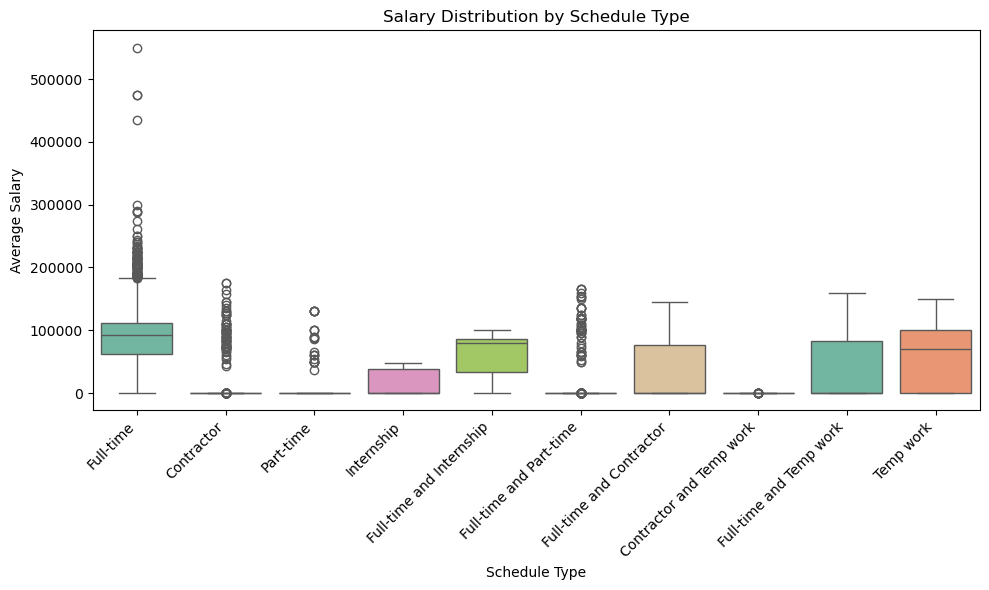

In [132]:
top_10 = data['schedule_type'].value_counts().head(10).index

plt.figure(figsize=(10, 6))

sns.boxplot(data=data[data['schedule_type'].isin(top_10)], x='schedule_type', y='salary_avg', palette='Set2')
plt.title('Salary Distribution by Schedule Type')
plt.xlabel('Schedule Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Full-time jobs have the highest average salary and also the widest range, while internships and part-time roles offer the lowest pay. Contractor roles fall in between full-time and part-time in average salary but also show a diverse range.

### Temporary and combined roles generally have moderate salaries. There are some notable outliers in full-time and contractor categories which indicate some postings offer significantly more than the average salary

## Multivariate Analysis

In [133]:
sal_cols = ['salary_avg', 'salary_min', 'salary_max', 'salary_standardized']

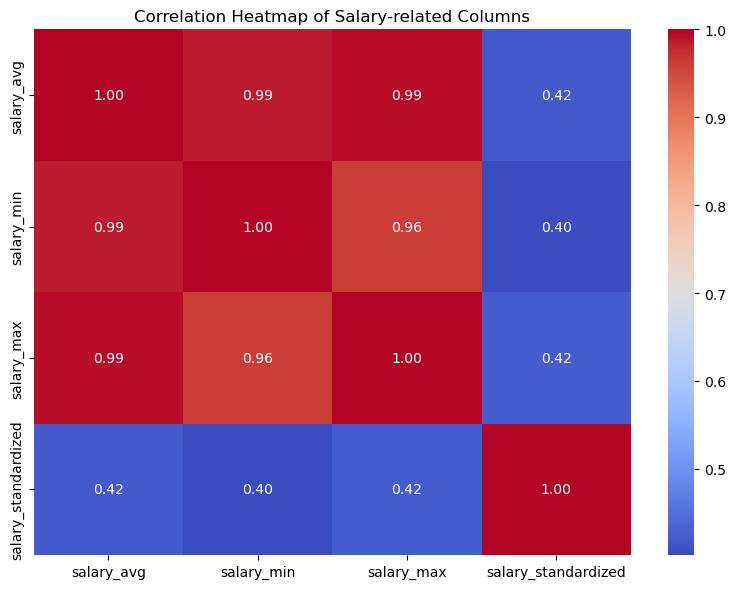

In [134]:
corr = data[sal_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Salary-related Columns')
plt.tight_layout()
plt.show()

## Location Transformations

In [135]:
data['description'] = data['description'].fillna('').astype(str)

In [136]:
def city_state(text):
    matches = re.findall(r'\b([A-Za-z\s]+),\s*([A-Z]{2})\b', text)
    return matches

In [137]:
data['location_data'] = data['description'].apply(city_state)

In [138]:
data['location_city'] = data['location_data'].apply(lambda x: x[0][0] if x else None)
data['location_state'] = data['location_data'].apply(lambda x: x[0][1] if x else None)

In [139]:
location_keywords = {
    "bay area": "CA",
    "silicon valley": "CA",
    "new york city": "NY",
    "nyc": "NY",
    "tri-state": "NY",
    "los angeles": "CA",
    "seattle area": "WA",
    "greater seattle": "WA",
    "dfw": "TX",
    "chicago area": "IL",
    "atlanta metro": "GA",
    "boston area": "MA",
    "san francisco": "CA",
    "washington dc": "DC"
}

In [140]:
def find_region_keywords(text):
    text = text.lower()
    for keyword, state in location_keywords.items():
        if keyword in text:
            return keyword, state
        return None, None

data[['region_keyword', 'region_state']] = data['description'].apply(lambda x: pd.Series(find_region_keywords(x)))

In [141]:
def choose_state(row):
    return row['location_state'] if pd.notnull(row['location_state']) else row['region_state']

data['state_result'] = data.apply(choose_state, axis=1)

In [142]:
job_counts = data['state_result'].value_counts().sort_values(ascending=False)

/var/folders/3f/6n41dbh50j169t78h6tncq1m0000gn/T/ipykernel_1065/2042991619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_states.values, y=top_25_states.index, palette='viridis')


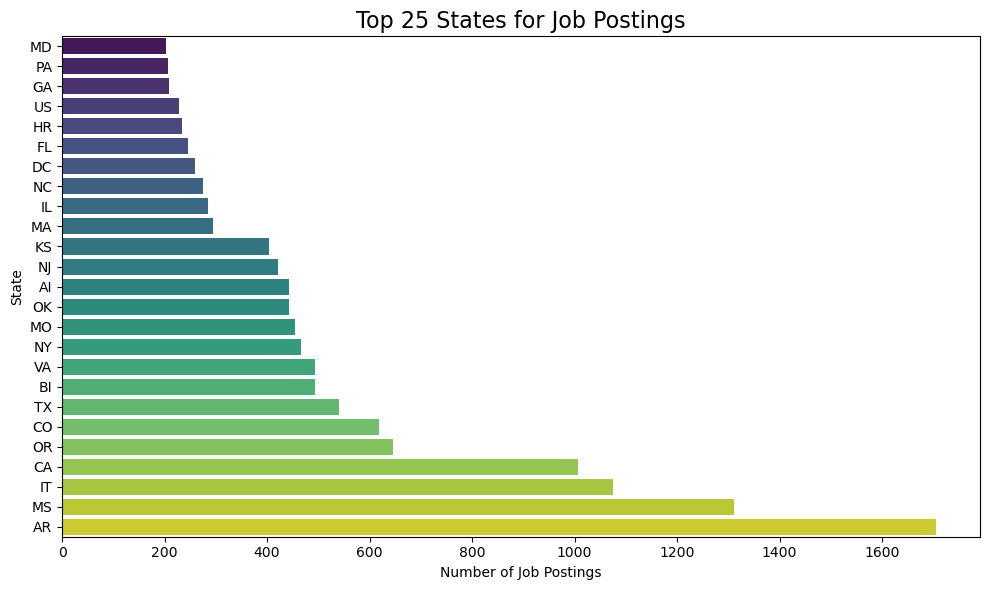

In [143]:
top_25_states = job_counts.head(25).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_25_states.values, y=top_25_states.index, palette='viridis')
plt.title('Top 25 States for Job Postings', fontsize=16)
plt.xlabel('Number of Job Postings')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### US, HR, IT, BI, And AI are not states. So what now? Let's filter

In [144]:
us_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
    'DC'
}

In [146]:
valid_states = data[data['state_result'].isin(us_states)]
top_25_states = valid_states['state_result'].value_counts().head(25)

/var/folders/3f/6n41dbh50j169t78h6tncq1m0000gn/T/ipykernel_1065/3952111401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_states.index, y=top_25_states.values, palette='viridis')


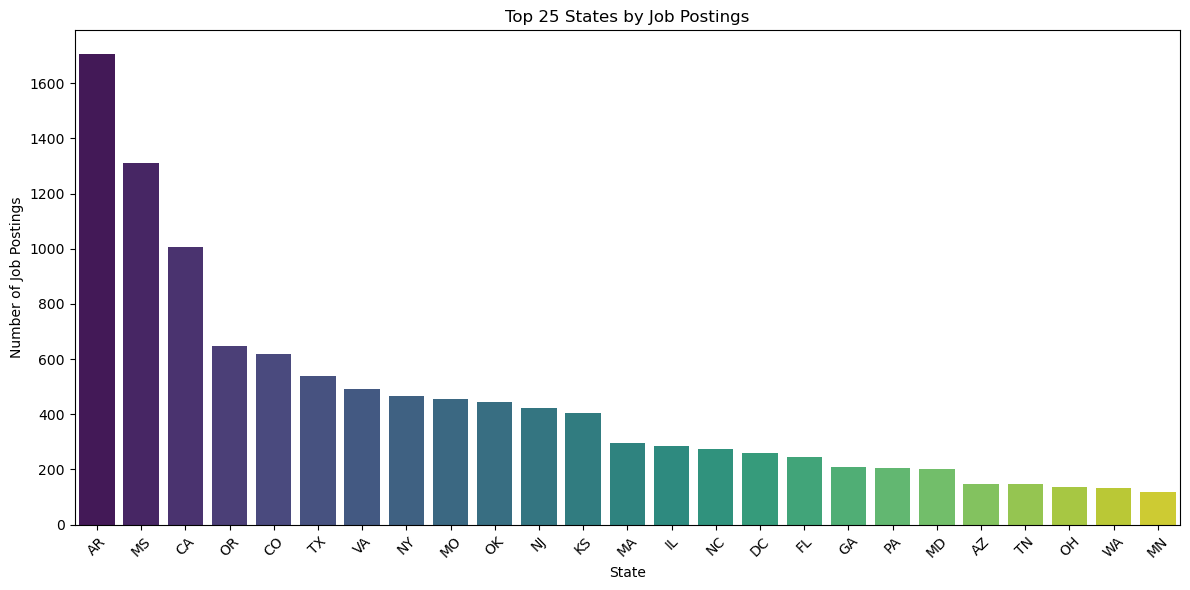

In [147]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_25_states.index, y=top_25_states.values, palette='viridis')
plt.title('Top 25 States by Job Postings')
plt.xlabel('State')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()